In [2]:
import torch

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AndrejKarpathy_NN_Hero/names.txt'

In [4]:
words = open(file_path, 'r').read().splitlines()

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
# The feature of a language model is to predict the next character in a string looking at the already given characters
# in each name, the first character is followed by a blank space, let's call it <S> Start Sequence, end each name ends with <E> end sequence

# Crude approach to Bigram

Works with 2 characters

With 1 given character, we try to predict the following character, by finding out the probability of each character based on given data.

In [7]:
for w in words[:3]:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [8]:
b = {} # frequency dictionary of each pair

for w in words:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [9]:
len(b)

627

In [10]:
sorted(b.items(), key= lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [11]:
# This information is way easier to store and visualize in a 2D array, than a dictionary
# rows - first character, columns - following character

# pytorch allows us to do this easily using tensors

In [12]:
import torch

In [13]:
chars = sorted(list(set(''.join(words))))
# lookup table
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['+'] = 0 # let's use a single character . instead of <S> and <E>
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '+': 0}

In [195]:
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chars = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1][ix2] += 1

In [196]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '+'}

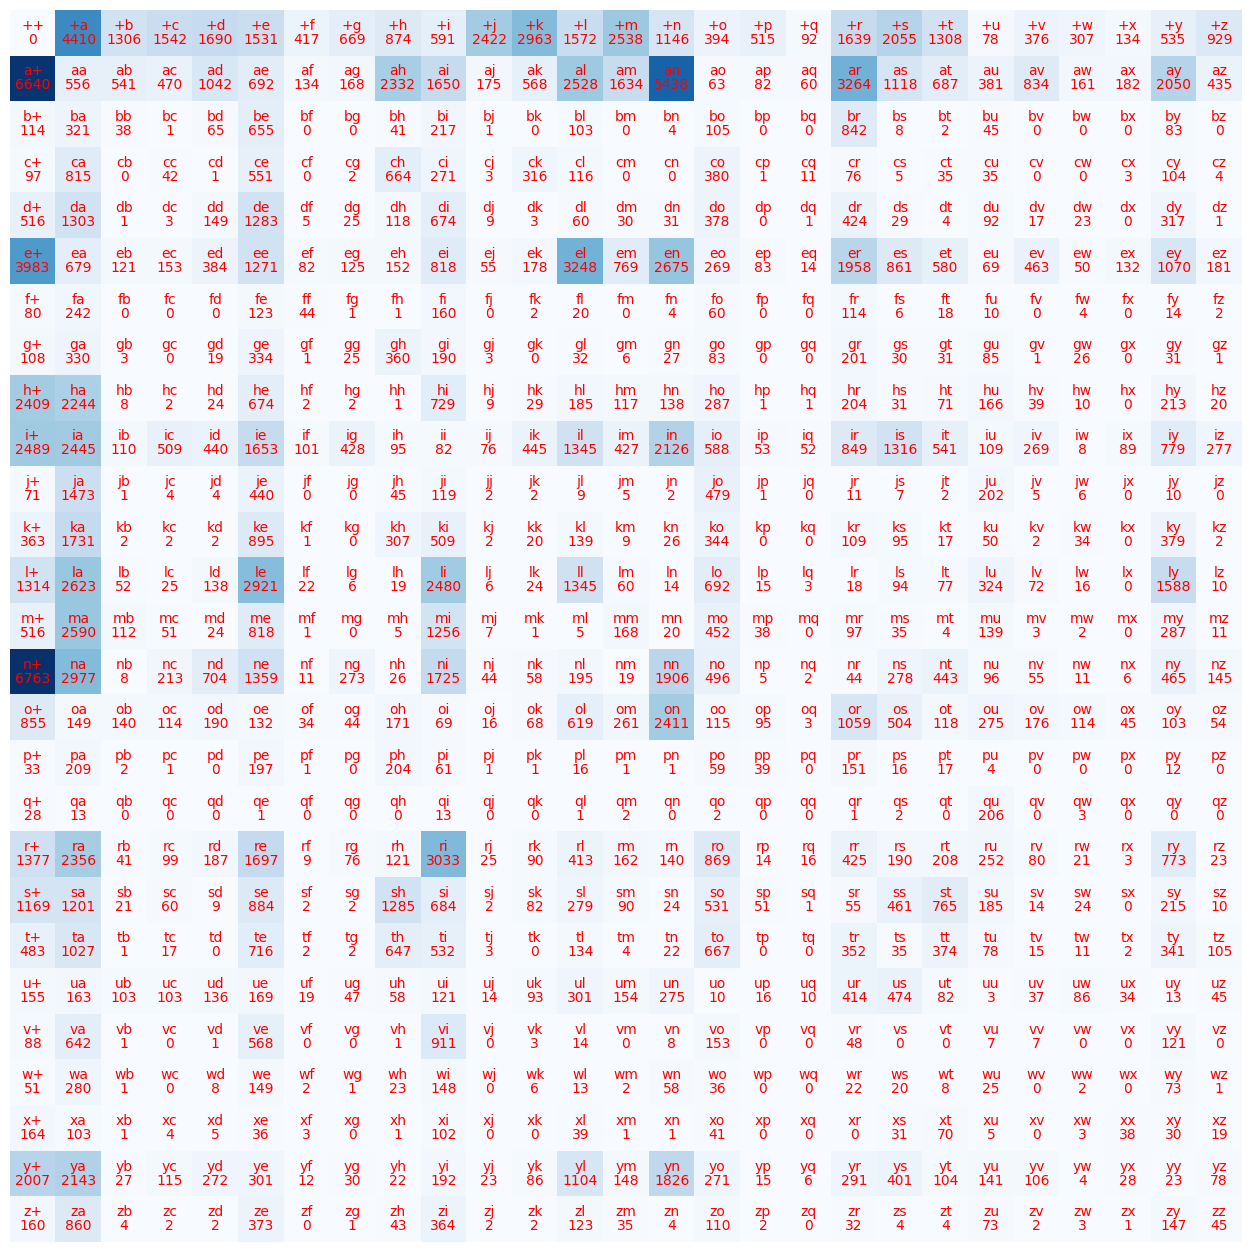

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
plt.axis("off")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="red")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="red")

In [17]:
# we have array of counts now, we need probability
# let's normalize the counts and get it

p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [197]:
# We will use a multinomial function to draw a character out based on its probability
# it uses a generator as input, so let's create a generator with a manual seed to make it deterministic (provide same output everytime)

g = torch.Generator().manual_seed(2147483647) # random definite number
initial_state = g.get_state()

# to get the most probable starting char, present in first row
p = N[0].float()
p = p/p.sum()

# multinomial sampling
g.set_state(initial_state)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [198]:
# so now, we have one character already sampled,
# to sample the next character, we will keep that as the starting char
# N[ix] shows the likelyhood of a character following itos[ix]

p = N[ix].float()
p = p/p.sum()

g.set_state(initial_state)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [20]:
import torch
g = torch.Generator().manual_seed(1)
p = torch.rand(3, generator=g)
g = torch.Generator().manual_seed(1)
print(torch.multinomial(p, num_samples=10, replacement=True, generator=g))
g.set_state(initial_state)
print(torch.multinomial(p, num_samples=10, replacement=True, generator=g))

# even with manual_seed the generator might yield different results, when state changes
# so reset the state to initial state after each operation

tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 0])
tensor([1, 2, 2, 0, 0, 2, 2, 0, 1, 1])


In [199]:
# get the probability matrix
# P = [n.float()/n.sum() for n in N]

# let's use torch's vectorized method to make it more efficient

P = N.float()
# P = P / P.sum(1, keepdim=True) # creates a new copy of P
P /= P.sum(1, keepdims=True) # inplace, no new memory
P[0].sum()

tensor(1.)

In [200]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    ix = 0
    wrd = ''
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix==0:
            break
        wrd += itos[ix]
    print(wrd)

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [23]:
# to measure the quality of the whole model

# we use, MLE (Maximum Likelyhood Estimation)
    # accuracy is proportional to the product of the probability of each pair in the whole model
    # to multiply the probabilities of each pair (b/w 0-1), will result in a very small number
    # so we use log likelyhood

In [24]:
for w in words[:3]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

+e: 0.0478, -3.0408
em: 0.0377, -3.2793
mm: 0.0253, -3.6772
ma: 0.3899, -0.9418
a+: 0.1960, -1.6299
+o: 0.0123, -4.3982
ol: 0.0780, -2.5508
li: 0.1777, -1.7278
iv: 0.0152, -4.1867
vi: 0.3541, -1.0383
ia: 0.1381, -1.9796
a+: 0.1960, -1.6299
+a: 0.1377, -1.9829
av: 0.0246, -3.7045
va: 0.2495, -1.3882
a+: 0.1960, -1.6299


In [25]:
# total likelyhood = product of likelyhood of each pair
    # = a * b * c
# taking log
# log(a*b*c) = log(a) + log(b) + log(c)

In [26]:
log_likelyhood = 0.0
n = 0
for w in words:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1
print(f'{log_likelyhood=}')

log_likelyhood=tensor(-559891.7500)


In [27]:
# max log likelyhood will be 0, so the closer it is to 0, the better it is. (We should increase log likelyhood to make model more accurate)
# but ideally we want a Loss function, which means the smaller it is, the more accurate it is.
# so we calculate Negative Log Likelyhood, the inverse of Log Likelyhood
nll = -log_likelyhood

print(f'{nll=}')
print(f'{nll/n=}') # average negative log likelyhood

nll=tensor(559891.7500)
nll/n=tensor(2.4541)


In [28]:
# so the higher the avg. nll, the worse our model is. We try to minimize the loss (nll)

In [29]:
# GOAL: maximize likelyhood of the data w.r.t. model parameters (statistical modelling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# Loss = avg -(log(a) + log(b) + log(c) .... + log(n))

In [30]:
# testing some names for their probability

log_likelyhood = 0
n=0

for w in ["andrej"]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

print(f'{log_likelyhood=}')
nll = -log_likelyhood
loss = nll/n

print(f'{nll=}')
print(f'{loss=}')

+a: 0.1377, -1.9829
an: 0.1605, -1.8296
nd: 0.0384, -3.2594
dr: 0.0771, -2.5620
re: 0.1336, -2.0127
ej: 0.0027, -5.9171
j+: 0.0245, -3.7098
log_likelyhood=tensor(-21.2735)
nll=tensor(21.2735)
loss=tensor(3.0391)


In [31]:
# testing some names for their probability

log_likelyhood = 0
n=0

for w in ["andrejq"]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

print(f'{log_likelyhood=}')
nll = -log_likelyhood
loss = nll/n

print(f'{nll=}')
print(f'{loss=}')

+a: 0.1377, -1.9829
an: 0.1605, -1.8296
nd: 0.0384, -3.2594
dr: 0.0771, -2.5620
re: 0.1336, -2.0127
ej: 0.0027, -5.9171
jq: 0.0000, -inf
q+: 0.1029, -2.2736
log_likelyhood=tensor(-inf)
nll=tensor(inf)
loss=tensor(inf)


In [32]:
# the loss for andrej was 3
# whereas loss for andrejq is inf
# because jq has a 0% probability to occur a/c to our model

# which says that andrejq is a very unlikely word as compared to andrej

In [33]:
# testing some names for their probability

log_likelyhood = 0
n=0

for w in [""]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1

print(f'{log_likelyhood=}')
nll = -log_likelyhood
loss = nll/n

print(f'{nll=}')
print(f'{loss=}')

log_likelyhood=tensor(-inf)
nll=tensor(inf)
loss=tensor(inf)


In [34]:
# to prevent such inf loss, we can smoothen our model by adding some fake counts

P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [35]:
# testing some names for their probability

log_likelyhood = 0
n=0

for w in ["andrejq"]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

print(f'{log_likelyhood=}')
nll = -log_likelyhood
loss = nll/n

print(f'{nll=}')
print(f'{loss=}')

+a: 0.1376, -1.9835
an: 0.1604, -1.8302
nd: 0.0384, -3.2594
dr: 0.0770, -2.5646
re: 0.1334, -2.0143
ej: 0.0027, -5.9004
jq: 0.0003, -7.9817
q+: 0.0970, -2.3331
log_likelyhood=tensor(-27.8672)
nll=tensor(27.8672)
loss=tensor(3.4834)


In [36]:
# now, even jq has a low probability (<> 0), it will not produce infinite loss

In [105]:
# this was bigram using basic frequency of each pair.

# Summary
    # 1. Count occurences of each pair
    # 2. Create a 2D Tensor Matrix of occurences
    # 3. Create probability matrix by row-wise normalization
    # 4. Sample characters using the probability matrix until we encounter a end sequence

# Let's jump into Neural Nets now

# Neural Network approach to Bigram

In [106]:
# Summary

# 1. Split the words into characters. Get input and output datasets of character pairs.
    # Make sure we use tensors to be efficient in the calculations
# 2. One hot encode the input data integers, to receive a vector that can be fed into the Neural Network
# 3. Generate a 27*27 Neuron Weights. Each Neuron receives 27 inputs
# 4. Neural Net produces Logits as output, normalize the logits using softmax to get probability distribution
# 5. Calculate loss using the probability distribution and minimize the loss

In [83]:
# create a training set for the Neural Network

xs, ys = [], []

for w in words:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [84]:
print(xs[:10])
print(ys[:10])

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22])
tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])


In [85]:
# we need to convert these integers to be converted into vectors(arrays) of floats that can be fed into a neural network

import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()
x_enc[:5]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [86]:
# one hot encoding will convert each integer into an array.
# so now each integer is an array of zeros with only it's index position having 1
# 0 is array of zeros with 1 at 0th index

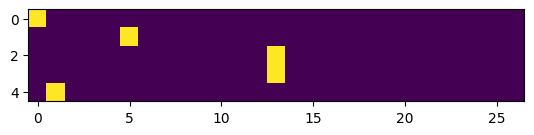

In [87]:
plt.imshow(x_enc[:5])

In [88]:
x1_enc = x_enc[:5]
W = torch.randn((27, 27)) # 27 * 27 Weights = 27 Neurons with 27 Weights each

# Matrix Mult
op = x1_enc @ W
op

tensor([[-0.8943, -1.0539,  0.2770, -1.7557, -0.7585,  1.2346,  0.8990, -0.7037,
          1.2195,  0.5382, -0.4050, -1.4669, -1.1629, -0.3509,  2.1762,  0.0060,
          0.3340, -0.7992, -1.6600,  0.4442, -1.8358,  0.1239, -1.0139, -0.7159,
         -0.1469,  0.6996, -0.8034],
        [ 0.6915,  0.5244,  0.5371,  0.3559,  0.7577, -0.9045, -0.9897, -1.2667,
          0.2793,  0.9192, -0.5261,  0.6549,  0.5273,  1.5924, -2.1465,  1.3396,
          0.0582, -2.8640, -0.7760, -2.5969,  0.1274, -0.3459, -1.8866,  0.3199,
          0.6080,  0.9822, -0.4998],
        [-1.2402,  0.7663,  1.2552,  1.4329,  1.0932, -1.1931, -1.3482,  0.6562,
          1.5234,  1.3248,  0.4403,  1.3210,  0.5283, -1.1763,  2.2645, -0.1217,
         -0.5312,  0.6163, -0.3418, -0.6771, -0.8547,  1.6973,  0.7567, -0.2929,
         -1.0781, -1.0430,  1.1171],
        [-1.2402,  0.7663,  1.2552,  1.4329,  1.0932, -1.1931, -1.3482,  0.6562,
          1.5234,  1.3248,  0.4403,  1.3210,  0.5283, -1.1763,  2.2645, -0.1217

In [89]:
op.shape
# (5, 27) @ (27, 27) = (5, 27)

torch.Size([5, 27])

In [90]:
# This has 5 inputs and 5 outputs overall
# each input goes through 27 Neurons, so produces 27 activations in total

# op[0][0] = activation of ip1 by N1
# op[0][1] = activation of ip2 by N2

# op[4][26] = activation of ip5 by N27
op[4][26]

tensor(-0.4528)

In [91]:
x1_enc[4] # 5th ip

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [92]:
W[:, 26] # 27th Neuron

tensor([-0.8034, -0.4528,  1.4209,  1.1542,  1.0037, -0.4998, -0.0486,  0.2832,
         0.0558, -0.4534, -0.3132,  1.2451, -0.4341,  1.1171,  1.2548,  0.4112,
         0.4653,  0.2694, -1.1308, -0.8423,  1.3837,  0.5034,  0.1259, -0.0199,
        -0.6567, -1.5067, -0.3234])

In [93]:
(x1_enc[4] * W[:, 26]).sum()

tensor(-0.4528)

In [94]:
# the outputs of these neural nets is the log count of each character after the given character

# it is not probability, as sum(probability) should add up to 1, but it will not add up here
# it is not actual counts as count cannot be float or negative

op[0]

tensor([-0.8943, -1.0539,  0.2770, -1.7557, -0.7585,  1.2346,  0.8990, -0.7037,
         1.2195,  0.5382, -0.4050, -1.4669, -1.1629, -0.3509,  2.1762,  0.0060,
         0.3340, -0.7992, -1.6600,  0.4442, -1.8358,  0.1239, -1.0139, -0.7159,
        -0.1469,  0.6996, -0.8034])

In [95]:
# op[0] shows the log count of each character after taking ip[0] as the inputx
x1_enc[0], op[0][4]

(tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor(-0.7585))

In [96]:
# this shows us that after x1_enc[0] i.e. '+'
# 'd' occurs count= e**log(count) = e**0.8951 times

In [104]:
logits = x_enc @ W # log counts
counts = logits.exp() # equivalent to N (counts matrix)
P = counts / counts.sum(1, keepdims=True) # equivalent to P
# the last 2 lines together are called "softmax" = exp(ki)/ sum(exp(k))

In [99]:
P.shape

torch.Size([228146, 27])

In [100]:
x_enc[0], P[0]

(tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0.0117, 0.0100, 0.0377, 0.0049, 0.0134, 0.0982, 0.0702, 0.0141, 0.0967,
         0.0489, 0.0191, 0.0066, 0.0089, 0.0201, 0.2518, 0.0287, 0.0399, 0.0128,
         0.0054, 0.0446, 0.0046, 0.0323, 0.0104, 0.0140, 0.0247, 0.0575, 0.0128]))

In [82]:
# By taking x_enc[0] as the input, our Weights have given us the Probability of each of the 27 characters that can follow it.
# This is our y_pred
# We already have our y_true.
# now we can formulate a loss function, maybe using RMSE method of both the arrays, then try to minimize it.

In [103]:
# predicted output
print(P[0])

# desired output
print(F.one_hot(ys[0], num_classes=27).float())

tensor([0.0117, 0.0100, 0.0377, 0.0049, 0.0134, 0.0982, 0.0702, 0.0141, 0.0967,
        0.0489, 0.0191, 0.0066, 0.0089, 0.0201, 0.2518, 0.0287, 0.0399, 0.0128,
        0.0054, 0.0446, 0.0046, 0.0323, 0.0104, 0.0140, 0.0247, 0.0575, 0.0128])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [107]:
# WORKING EXAMPLE

In [108]:
# create a training set for the Neural Network

xs, ys = [], []

for w in words[:1]:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [112]:
# One hot encode the training input

xenc = F.one_hot(xs, num_classes=27).float()

print(xs)
print(xenc)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([ 5, 13, 13,  1,  0])


In [113]:
# Generate a random Neural Network with 27 Neurons and 27 Weights each

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [117]:
# Product NN output as logits and get probability distribution from them

logits = xenc @ W
# Softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

# We make sure that all the operations used here are differentiable, so that we can backpropogate through them

In [118]:
probs # generated probability of each character occuring based in the input character vector

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [119]:
probs.shape

torch.Size([5, 27])

In [120]:
# 5 outputs with probability distribution of the 27 characters

In [129]:
# Calculating loss
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    xind = xs[i].item() # index of input character
    yind = ys[i].item() # index of output character
    print("------------------------------")
    print(f'Bigram Example {i}: {itos[xind]}{itos[yind]} (indexes({xind, yind}))')
    print(f'Input to the Neural Network: {xenc[i]}')
    print(f'Output probability distribution from Neural Network: {probs[i]}')
    print(f'Label (Actual Next Character Index): {yind}')

    p = probs[i][yind]
    print(f'Probability assigned by Neural Net to the actual character Index: {p.item()}')

    logp = torch.log(p)
    print(f'Log Likelihood: {logp.item()}')
    nll = -logp
    print(f'Negative Log Likelihood: {nll.item()}')
    nlls[i] = nll
    print("------------------------------")

print(f'Average Negative Log Likelihood: {nlls.mean().item()}')

------------------------------
Bigram Example 0: +e (indexes((0, 5)))
Input to the Neural Network: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output probability distribution from Neural Network: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Label (Actual Next Character Index): 5
Probability assigned by Neural Net to the actual character Index: 0.01228625513613224
Log Likelihood: -4.399273872375488
Negative Log Likelihood: 4.399273872375488
------------------------------
------------------------------
Bigram Example 1: em (indexes((5, 13)))
Input to the Neural Network: tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output probability dist

In [131]:
# So now, we can increase the probability of the correct index,
# which will increase the loglikelihood
# which will inturn decrease the negative log likelihood and our loss

In [132]:
## OPTIMIZATION

In [133]:
xs

tensor([ 0,  5, 13, 13,  1])

In [134]:
ys

tensor([ 5, 13, 13,  1,  0])

In [146]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [147]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [148]:
# calculate loss (negative log likelihood)
nlls = torch.zeros(len(ys))

for i in range(len(ys)):
    act_ind = ys[i]
    pred_prob = probs[i, act_ind]
    logp = torch.log(pred_prob)
    nll = -logp
    nlls[i] = nll

print(f'{nlls=}')
print(f'Loss = {nlls.mean().item()}')

nlls=tensor([4.3993, 4.0146, 3.6234, 2.6081, 4.2012], grad_fn=<CopySlices>)
Loss = 3.7693049907684326


In [149]:
# Torch way to do it

# n = len(ys)
# idxs = torch.arange(n)
# pred_probs = probs[idxs, ys]
# loss = -pred_probs.log().mean()

loss = -probs[torch.arange(len(ys)), ys].log().mean() # don't dig into .item(), as we will need the backward function later

print(f'{loss=}')

loss=tensor(3.7693, grad_fn=<NegBackward0>)


In [156]:
# Backward pass
W.grad = None # setting grad to 0
loss.backward() # Torch tensors have inbuilt backward method

In [158]:
# Nudge the weights
W.data += -0.1 * W.grad

In [159]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(len(ys)), ys].log().mean()

print(f'{loss=}')

loss=tensor(3.7292, grad_fn=<NegBackward0>)


In [155]:
# Loss has decreased by some amount

In [165]:
# making a func to make it easier
def optimize_w(xenc, W):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()
    # Backward pass
    W.grad = None # setting grad to 0
    loss.backward()

    # Nudging the weights
    W.data += -0.1 * W.grad

    # Forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean()

    print(f'{loss=}')

In [167]:
optimize_w(xenc, W)

loss=tensor(3.6892, grad_fn=<NegBackward0>)


In [168]:
# LET"S USE ALL THE WORDS NOW

In [182]:
# create a training set for the Neural Network

xs, ys = [], []

for w in words:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
xenc = F.one_hot(xs, num_classes=27).float()
ys = torch.tensor(ys)
n = xs.nelement()

print(f"Number of bigrams: {n}")

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of bigrams: 228146


In [183]:
# Gradient Descent

for i in range(100):
    # Forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(n), ys].log().mean()
    print(loss.item())

    # Backward pass
    W.grad = None
    loss.backward()

    # nudging the weights
    W.data += -100 * W.grad

3.758953809738159
3.129453659057617
2.914113998413086
2.799959421157837
2.7337806224823
2.6869499683380127
2.6551661491394043
2.6306018829345703
2.6211442947387695
2.607550859451294
2.616842031478882
2.5821337699890137
2.5751070976257324
2.5671329498291016
2.5811874866485596
2.552203893661499
2.5510077476501465
2.545224905014038
2.561443567276001
2.5346157550811768
2.535997152328491
2.531637668609619
2.549158811569214
2.523322820663452
2.525953769683838
2.5225727558135986
2.5409584045410156
2.5155911445617676
2.5188534259796143
2.5161516666412354
2.535137891769409
2.510000705718994
2.513601779937744
2.511373281478882
2.530787229537964
2.505772590637207
2.5095698833465576
2.5076775550842285
2.527402877807617
2.502464532852173
2.5063893795013428
2.504737138748169
2.5246903896331787
2.4998087882995605
2.503826856613159
2.502347707748413
2.5224721431732178
2.497635841369629
2.5017266273498535
2.5003745555877686
2.5206282138824463
2.4958291053771973
2.4999799728393555
2.498723030090332
2.51

In [187]:
# Gradient Descent

for i in range(100):
    # Forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(n), ys].log().mean()
    print(loss.item())

    # Backward pass
    W.grad = None
    loss.backward()

    # nudging the weights
    W.data += -50 * W.grad

2.4601924419403076
2.460165500640869
2.460139513015747
2.460113525390625
2.460087537765503
2.460061550140381
2.460036277770996
2.4600107669830322
2.4599854946136475
2.459960699081421
2.4599363803863525
2.459911823272705
2.4598872661590576
2.4598629474639893
2.459839105606079
2.459815263748169
2.459791660308838
2.459768295288086
2.459745168685913
2.4597220420837402
2.4596991539001465
2.4596760272979736
2.459653854370117
2.4596312046051025
2.459609270095825
2.4595870971679688
2.4595654010772705
2.459543466567993
2.459521770477295
2.459500551223755
2.4594790935516357
2.4594578742980957
2.459437131881714
2.459416389465332
2.4593958854675293
2.4593751430511475
2.4593544006347656
2.4593346118927
2.4593143463134766
2.459294319152832
2.4592745304107666
2.4592549800872803
2.459235429763794
2.4592161178588867
2.4591968059539795
2.4591777324676514
2.4591588973999023
2.459139823913574
2.459120988845825
2.4591026306152344
2.4590840339660645
2.4590656757354736
2.459047317504883
2.45902943611145
2.45

In [189]:
# This is the minimum loss we can achieve, as this was the loss we received using counting bigram method

# https://colab.research.google.com/drive/1iHfTiwFtw3onIbGrwKztnypaes2bjsx7#scrollTo=XvZVJCQk3lm4&line=3&uniqifier=1

In [190]:
# Neural Net Bigram is preferrable, as this concept can be taken to more complex methods as in Transformers etc.
# It is also easier to make a Trigram out of this easily

In [191]:
# SAMPLING

In [203]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    ix = 0
    wrd = ''
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix==0:
            break
        wrd += itos[ix]
    print(wrd)

junide
janasah
prelay
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabi
werimikimaynin
anaasn
ssorionsush


In [201]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    ix = 0
    wrd = ''
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix==0:
            break
        wrd += itos[ix]
    print(wrd)

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [204]:
# We can see that the samplings are almost identical as they are built from the same data with same accuracy

In [205]:
# REGULARIZATION

In [206]:
# as in the counting method, we can add a number to the counts to make the probability distribution smoother
# N+100

# We can do the same in Neural Net using Regularization
# Here, the probability distribution can be smooth when the counts are similar (almost same)
# to make the counts same, we need to get the logits also same
# to have same logits throughout, it can be achieved if we multiply xenc with 0. (If we initialize W=0)
# this will give us logits = 0, counts = 1, and equal probability distribution

# to focus on getting the Weights to 0,
# we can include a term of it directly in the loss function and try to minimize loss, which will also affect the W

# loss = -probs[torch.arange(n), ys].log().mean() + 0.1 *(W**2).mean()

# here 0.1 is the "Strength of regularization"
# we square W to get rid of the negative signs and then take the mean to reduce the value

In [207]:
# SUMMARY

# 1. Create a dataset (xs, ys) with indices
# 2. One hot encode the xs dataset
# 3. Create a Net with 27 Neurons and 27 weights each at random
# 4. Get logits as output of the matrix multiplication xenc @ W
# 5. Get probability distribution from the logits using softmax
# 6. Calculate loss using probability distribution
# 7. Backward prop the loss to generate gradients (Make sure to set the grad to None first)
# 8. Nudge the weights using gradient descent
# 9. Check the loss and repeat 6,7,8 till satisfied with the loss

In [208]:
# TRIGRAM PRACTICE

In [244]:
# create a training set for the Neural Network
x1s = []
x2s = []
ys = []

for w in words:
    chs = ['+'] + list(w) + ['+']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        x1s.append(ix1)
        x2s.append(ix2)
        ys.append(ix3)

x1s = torch.tensor(x1s)
x2s = torch.tensor(x2s)
x1enc = F.one_hot(x1s, num_classes=27).float()
x2enc = F.one_hot(x2s, num_classes=27).float()
ys = torch.tensor(ys)
n = x1s.nelement()

print(f"Number of trigrams: {n}")

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

# Calculation:
# x_enc = [x1_enc] + [x2+enc] = [1, 54]
# W = [54, 27]

# logits = x_enc @ W = [1, 54] @ [54, 27] = [1, 27]
# Same logic from thereon

Number of trigrams: 196113


In [245]:
x1enc.shape, x1_enc[0]

(torch.Size([196113, 27]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [246]:
xenc = torch.cat([x1enc, x2enc], dim=1) # dim= dimension to concat(rows)
xenc.shape

torch.Size([196113, 54])

In [247]:
logits = xenc @ W
counts = logits.exp()
probs = counts/ counts.sum(1, keepdims=True)

In [248]:
loss = -probs[torch.arange(n), ys].log().mean()
loss

tensor(4.1863, grad_fn=<NegBackward0>)

In [249]:
# backward pass
W.grad = None
loss.backward()

In [250]:
W.data += -0.1 * W.grad

In [251]:
logits = xenc @ W
counts = logits.exp()
probs = counts/ counts.sum(1, keepdims=True)
loss = -probs[torch.arange(n), ys].log().mean()
loss

tensor(4.1842, grad_fn=<NegBackward0>)

In [252]:
# PUTTING IT ALL TOGETHER

In [261]:
# Gradient Descent

for i in range(1000):
    # Forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(n), ys].log().mean()
    # print(loss.item())

    # Backward pass
    W.grad = None
    loss.backward()

    # nudging the weights
    W.data += -1 * W.grad
print(loss.item())

2.283776044845581


In [262]:
# Bit more accurate than bigram

In [263]:
## TESTING TRIGRAM

In [267]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    ix = [0, 0]
    wrd = ''
    while True:
        x1enc = F.one_hot(torch.tensor([ix[0]]), num_classes=27).float()
        x2enc = F.one_hot(torch.tensor([ix[1]]), num_classes=27).float()
        xenc = torch.cat([x1enc, x2enc], dim=1)
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)
        ix_next = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix_next==0:
            break
        wrd += itos[ix_next]
        ix = [ix[-1], ix_next]
    print(wrd)

aunide
aliasaz
alen
amainn
aui
ritoleras
gel
adannaauranileniassdbdainrwimel
seisiely
arte


In [268]:
# bit more namelike than bigram model